In [1]:
!pip3 install pandas matplotlib scikit-learn imblearn sklearn_features

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE  
import urllib.request as request
import zipfile

In [3]:
dataset_url = "https://github.com/Abdallah-Ahmed-98/DATASETS/raw/main/Churndataset.zip"
data_file = "data/data.zip"
unzip_path = "data/"

def download_file(dataset_url, data_file):
    if not os.path.exists(data_file):
        filename, headers = request.urlretrieve(
            url = dataset_url,
            filename = data_file
        )
        print(f"{filename} download! with following info: \n{headers}")
    else:
        print("File already exists.")



def extract_zip_file():
    """
    zip_file_path: str
    Extracts the zip file into the data directory
    Function returns None
    """
    with zipfile.ZipFile(data_file, 'r') as zip_ref:
        zip_ref.extractall(unzip_path)
  

In [4]:
download_file(dataset_url, data_file)
extract_zip_file()

File already exists.


In [5]:
df = pd.read_csv("data/Churndataset.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)

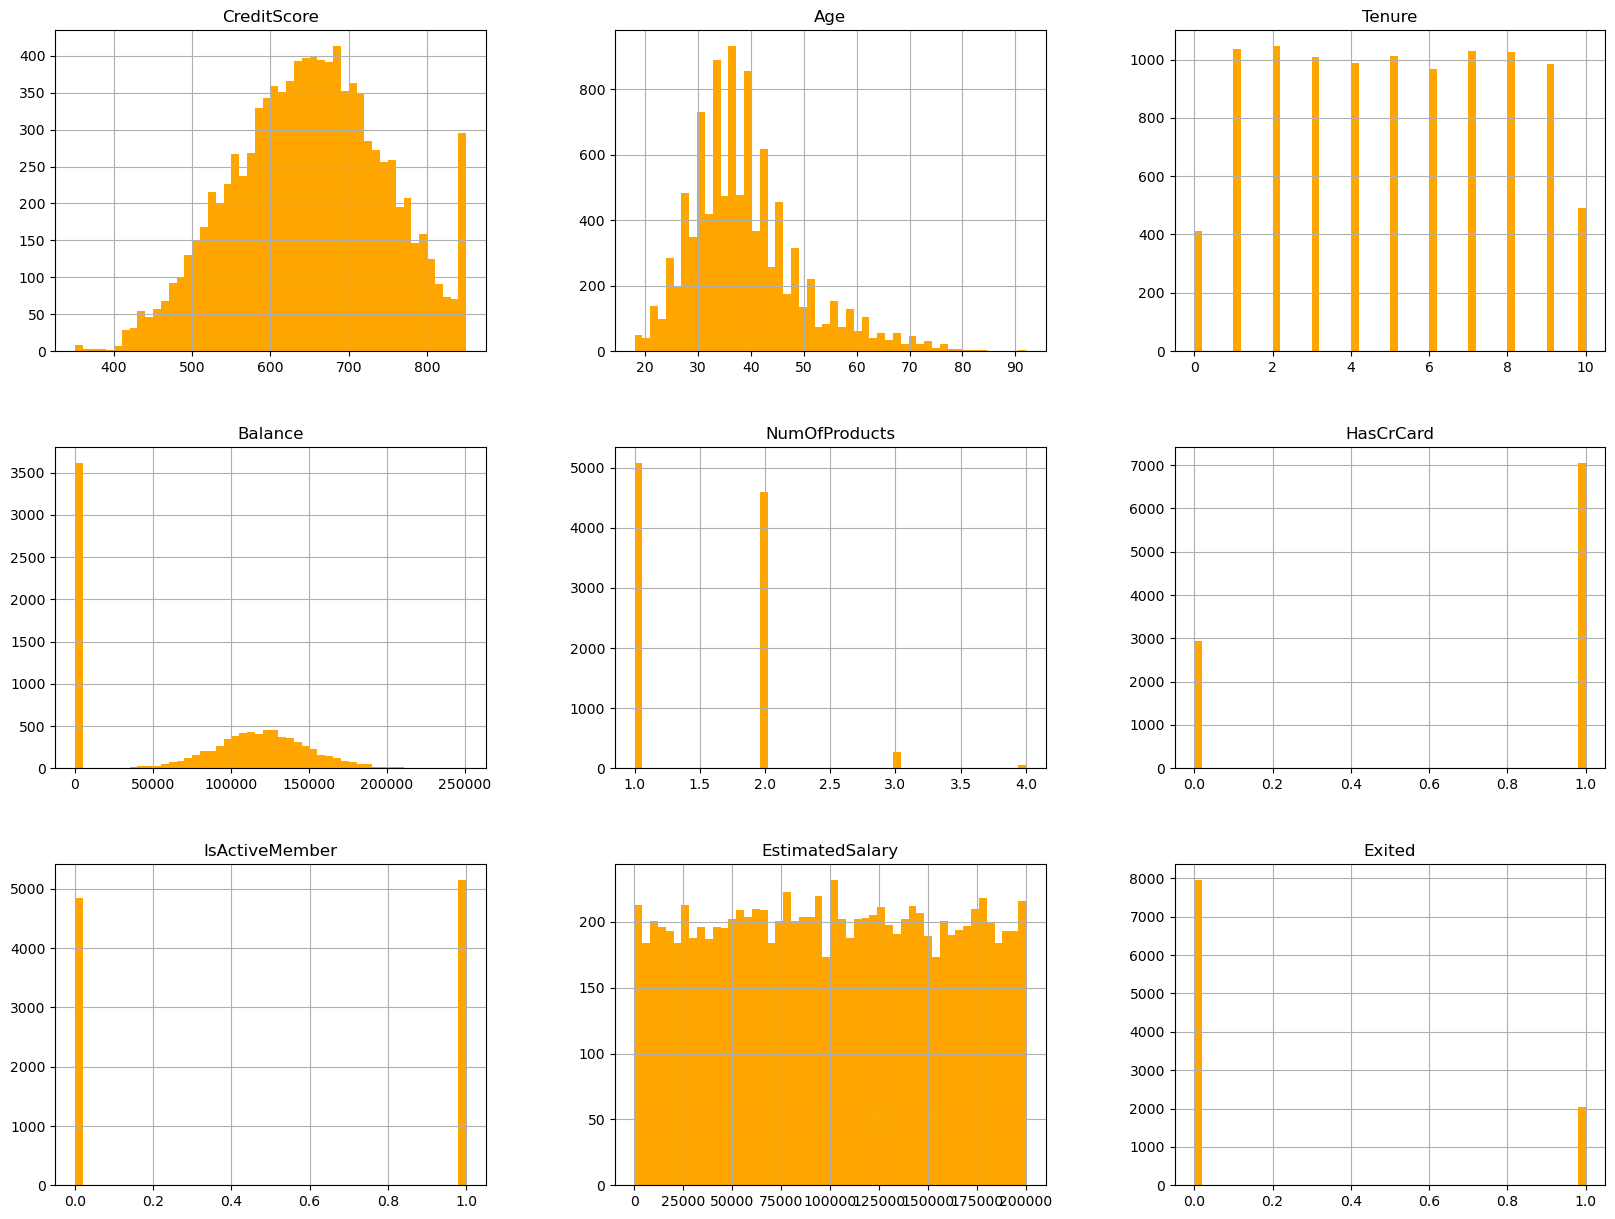

In [11]:
df.hist(bins=50, figsize=(20,15), color="orange")
plt.show()

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer  # To handle feature transformations efficiently
from sklearn.model_selection import train_test_split
import pandas as pd

## Split to train and test
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45, stratify=y)

## Slice the lists
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categ_cols = ['Gender', 'Geography']
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))

## For Numerical
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## For Categorical
categ_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False))
])

## For ready cols
ready_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

## Combine all with ColumnTransformer (recommended over FeatureUnion for DataFrames)
preprocessor = ColumnTransformer(transformers=[
                                            ('numerical', num_pipeline, num_cols),
                                            ('categorical', categ_pipeline, categ_cols),
                                            ('ready', ready_pipeline, ready_cols)
                                     ])
## Apply transformation
preprocessor.fit(X_train)

# Get final column names
out_categ_cols = preprocessor.named_transformers_['categorical'].named_steps['ohe'].get_feature_names_out(categ_cols)


# Convert back to DataFrame
X_train_final = pd.DataFrame(preprocessor.transform(X_train), columns=num_cols + list(out_categ_cols) + ready_cols)
X_test_final = pd.DataFrame(preprocessor.transform(X_test), columns=num_cols + list(out_categ_cols) + ready_cols)


train = pd.concat([X_train_final.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test = pd.concat([X_test_final.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Save transformed train and test data
train.to_csv(os.path.join(unzip_path, "train.csv"), index=False)
test.to_csv(os.path.join(unzip_path, "test.csv"), index=False)

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)


# Initialize RandomizedSearchCV with the same parameter grid
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
random_search.fit(X_train_final, y_train)

# Get the best combination of parameters
best_params = random_search.best_params_
print("Best Hyperparameters (Random Search):", best_params)

# Evaluate the model with the best hyperparameters
best_rf_model = random_search.best_estimator_

# Test the best model on the test set
y_pred = best_rf_model.predict(X_test_final)

# Print performance metrics
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters (Random Search): {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

